### 2.1 Loading and preparation of data

In [1]:
import pandas as pd
prices = pd.read_csv('average-property-price.csv')
prices

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [2]:
df = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
df

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


### Region data

In [3]:
df_E12 = df.loc[(df.Code == 'E12000001')|(df.Code == 'E12000002')|(df.Code == 'E12000003')|
                 (df.Code == 'E12000004')|(df.Code == 'E12000005')|(df.Code == 'E12000006')|
                 (df.Code == 'E12000007')|(df.Code == 'E12000008')|(df.Code == 'E12000009')]
df_E12.isna().value_counts()

Area   Code   Detached  Semi   Terraced  Flat   Month
False  False  False     False  False     False  False    324
dtype: int64

In [4]:
df_E12

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


### Area Data

In [5]:
df_area = df.drop(df_E12.index)
df_area

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


### Location data with English region codes of areas (local government)

In [6]:
location = pd.read_csv('location-codes.csv')
location

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


### Renaming column names(location region code file)to merge with local government area dataset

In [7]:
location.rename(columns={"AuthorityCode":"Code", "AuthorityName":"Area"}, inplace=True)   
location

,Code,Area,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


### Merging the location region codes with the area dataset to prepare the area-region dataset

In [8]:
df_area_region = pd.merge(location, df_area, how="right", on=["Area","Code"])
df_area_region

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,E06000001,Hartlepool,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,E06000001,Hartlepool,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,E06000001,Hartlepool,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,E06000001,Hartlepool,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,E06000001,Hartlepool,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...,...
5431,E10000034,Worcestershire,E12000005,West Midlands,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,E10000034,Worcestershire,E12000005,West Midlands,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,E10000034,Worcestershire,E12000005,West Midlands,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,E10000034,Worcestershire,E12000005,West Midlands,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


In [27]:
df_area_region.RegionCode.value_counts()

E12000007    1116
E12000002     792
E12000008     684
E12000003     504
E12000005     468
E12000009     468
E12000001     432
0             360
E12000006     360
E12000004     252
Name: RegionCode, dtype: int64

In [10]:
df_null_area_property = df_area_region.loc[(df_area_region.Detached.isnull())|(df_area_region.Semi.isnull())|
                   (df_area_region.Terraced.isnull())|(df_area_region.Flat.isnull())]
df_null_area_property

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
3276,E09000001,City of London,E12000007,London,NaN,NaN,1189233.714,777891.9778,2016-09-01
3277,E09000001,City of London,E12000007,London,NaN,NaN,1195010.116,790055.2118,2016-10-01
3278,E09000001,City of London,E12000007,London,NaN,NaN,1229507.612,815992.8991,2016-11-01
3279,E09000001,City of London,E12000007,London,NaN,NaN,1217012.801,809149.8515,2016-12-01
3280,E09000001,City of London,E12000007,London,NaN,NaN,1227434.570,817654.0898,2017-01-01
3281,E09000001,City of London,E12000007,London,NaN,NaN,1189660.065,818093.5200,2017-02-01
3282,E09000001,City of London,E12000007,London,NaN,NaN,1176573.144,851416.0699,2017-03-01
3283,E09000001,City of London,E12000007,London,NaN,NaN,1238739.417,903551.8492,2017-04-01
3284,E09000001,City of London,E12000007,London,NaN,NaN,1277795.874,937307.4240,2017-05-01
3285,E09000001,City of London,E12000007,London,NaN,NaN,1174213.336,928316.5022,2017-06-01


In [11]:
df_null_area_property['Area'].unique()

array(['City of London'], dtype=object)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

In [13]:
df_area_region

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,E06000001,Hartlepool,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,E06000001,Hartlepool,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,E06000001,Hartlepool,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,E06000001,Hartlepool,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,E06000001,Hartlepool,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...,...
5431,E10000034,Worcestershire,E12000005,West Midlands,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,E10000034,Worcestershire,E12000005,West Midlands,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,E10000034,Worcestershire,E12000005,West Midlands,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,E10000034,Worcestershire,E12000005,West Midlands,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


#### 2.2 Part 2 Trends

In [14]:
df_E12

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


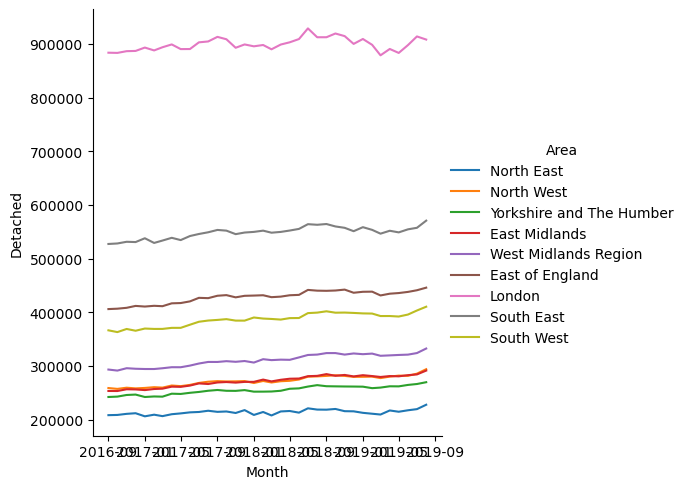

In [15]:
sns.relplot(data=df_E12, x="Month", y="Detached", kind="line", hue="Area")

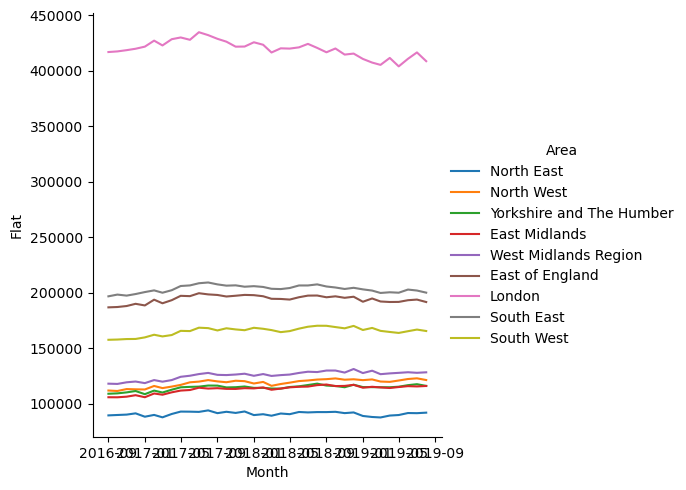

In [16]:
sns.relplot(data=df_E12, x="Month", y="Flat", kind="line", hue="Area")


In [17]:
df_area_region = df_area_region.fillna(0)
df_area_region.isna().value_counts()

Code   Area   RegionCode  RegionName  Detached  Semi   Terraced  Flat   Month
False  False  False       False       False     False  False     False  False    5436
dtype: int64

In [18]:
df_area_region

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,E06000001,Hartlepool,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,E06000001,Hartlepool,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,E06000001,Hartlepool,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,E06000001,Hartlepool,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,E06000001,Hartlepool,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...,...
5431,E10000034,Worcestershire,E12000005,West Midlands,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,E10000034,Worcestershire,E12000005,West Midlands,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,E10000034,Worcestershire,E12000005,West Midlands,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,E10000034,Worcestershire,E12000005,West Midlands,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


In [19]:
July_2017 = df_area_region.loc[(df_area_region.Month == '2017-07-01')]
July_2017

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
10,E06000001,Hartlepool,E12000001,North East,186030.1497,112168.0127,79436.27053,65007.84170,2017-07-01
46,E06000002,Middlesbrough,E12000001,North East,187695.9901,111107.0273,79505.65683,69163.06963,2017-07-01
82,E06000003,Redcar and Cleveland,E12000001,North East,187618.3790,117895.4611,89473.56935,65507.80990,2017-07-01
118,E06000004,Stockton-on-Tees,E12000001,North East,210016.6510,123232.6999,95599.36140,83599.32806,2017-07-01
154,E06000005,Darlington,E12000001,North East,227479.6970,136030.9295,102533.59940,87041.37973,2017-07-01
...,...,...,...,...,...,...,...,...,...
5266,E10000029,Suffolk,E12000006,East of England,353962.6700,222352.9988,181134.70370,140278.18370,2017-07-01
5302,E10000030,Surrey,E12000008,South East,786923.8580,455596.0847,366461.71500,270116.52610,2017-07-01
5338,E10000031,Warwickshire,E12000005,West Midlands,380046.1182,223519.0122,185720.66520,165676.94800,2017-07-01
5374,E10000032,West Sussex,E12000008,South East,529397.3694,342983.0789,276630.46710,193547.45490,2017-07-01


In [20]:
July_2017_price=July_2017.iloc[:,[1,2,7]]
July_2017_price

,Area,RegionCode,Flat
10,Hartlepool,E12000001,65007.84170
46,Middlesbrough,E12000001,69163.06963
82,Redcar and Cleveland,E12000001,65507.80990
118,Stockton-on-Tees,E12000001,83599.32806
154,Darlington,E12000001,87041.37973
...,...,...,...
5266,Suffolk,E12000006,140278.18370
5302,Surrey,E12000008,270116.52610
5338,Warwickshire,E12000005,165676.94800
5374,West Sussex,E12000008,193547.45490


In [21]:
July_2018 = df_area_region.loc[(df_area_region.Month == '2018-07-01')]
July_2018

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
22,E06000001,Hartlepool,E12000001,North East,180836.5829,108917.0807,76843.00978,61116.82158,2018-07-01
58,E06000002,Middlesbrough,E12000001,North East,195242.2776,114478.7800,81719.20818,69313.90788,2018-07-01
94,E06000003,Redcar and Cleveland,E12000001,North East,193610.9431,121328.4945,91356.79184,64802.79724,2018-07-01
130,E06000004,Stockton-on-Tees,E12000001,North East,217157.6600,126721.7533,98056.49338,83654.55272,2018-07-01
166,E06000005,Darlington,E12000001,North East,226111.4674,135207.6796,101324.34550,83679.31818,2018-07-01
...,...,...,...,...,...,...,...,...,...
5278,E10000029,Suffolk,E12000006,East of England,370793.9793,232946.0909,188202.33800,142488.46480,2018-07-01
5314,E10000030,Surrey,E12000008,South East,807900.6081,465170.1267,373357.05160,267144.69100,2018-07-01
5350,E10000031,Warwickshire,E12000005,West Midlands,399930.9556,235098.5494,194531.76610,167470.71860,2018-07-01
5386,E10000032,West Sussex,E12000008,South East,545859.8494,353171.1349,283575.16210,191835.79530,2018-07-01


In [22]:
July_2018_price = July_2018.iloc[:,[1,2,7]]
July_2018_price

,Area,RegionCode,Flat
22,Hartlepool,E12000001,61116.82158
58,Middlesbrough,E12000001,69313.90788
94,Redcar and Cleveland,E12000001,64802.79724
130,Stockton-on-Tees,E12000001,83654.55272
166,Darlington,E12000001,83679.31818
...,...,...,...
5278,Suffolk,E12000006,142488.46480
5314,Surrey,E12000008,267144.69100
5350,Warwickshire,E12000005,167470.71860
5386,West Sussex,E12000008,191835.79530


In [23]:
df_grid = pd.merge(July_2017_price, July_2018_price, how="right", on=["Area","RegionCode"])
df_grid

,Area,RegionCode,Flat_x,Flat_y
0,Hartlepool,E12000001,65007.84170,61116.82158
1,Middlesbrough,E12000001,69163.06963,69313.90788
2,Redcar and Cleveland,E12000001,65507.80990,64802.79724
3,Stockton-on-Tees,E12000001,83599.32806,83654.55272
4,Darlington,E12000001,87041.37973,83679.31818
...,...,...,...,...
146,Suffolk,E12000006,140278.18370,142488.46480
147,Surrey,E12000008,270116.52610,267144.69100
148,Warwickshire,E12000005,165676.94800,167470.71860
149,West Sussex,E12000008,193547.45490,191835.79530


In [24]:
df_grid = df_grid.assign(Change = df_grid['Flat_x'] - df_grid['Flat_y'])
df_grid

,Area,RegionCode,Flat_x,Flat_y,Change
0,Hartlepool,E12000001,65007.84170,61116.82158,3891.02012
1,Middlesbrough,E12000001,69163.06963,69313.90788,-150.83825
2,Redcar and Cleveland,E12000001,65507.80990,64802.79724,705.01266
3,Stockton-on-Tees,E12000001,83599.32806,83654.55272,-55.22466
4,Darlington,E12000001,87041.37973,83679.31818,3362.06155
...,...,...,...,...,...
146,Suffolk,E12000006,140278.18370,142488.46480,-2210.28110
147,Surrey,E12000008,270116.52610,267144.69100,2971.83510
148,Warwickshire,E12000005,165676.94800,167470.71860,-1793.77060
149,West Sussex,E12000008,193547.45490,191835.79530,1711.65960


In [34]:
df_grid.loc[(df_grid.RegionCode == '0')]

,Area,RegionCode,Flat_x,Flat_y,Change


In [35]:
df_grid.RegionCode.value_counts()

E12000007    31
E12000002    22
E12000008    19
E12000003    14
E12000005    13
E12000009    13
E12000001    11
0            10
E12000006    10
E12000004     7
Name: RegionCode, dtype: int64

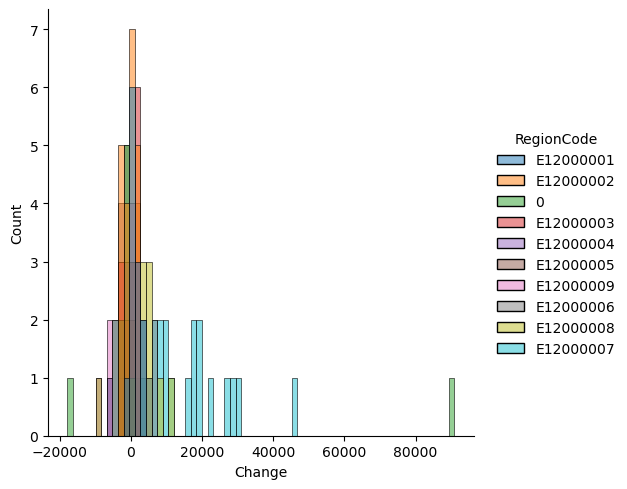

In [25]:
sns.displot(df_grid, x="Change", hue="RegionCode",)

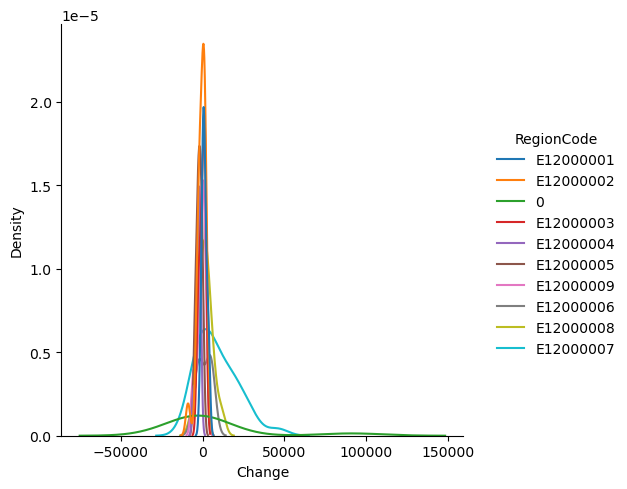

In [26]:
sns.displot(df_grid, x="Change", kind="kde", hue="RegionCode")